In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
file_name_1 = 'Data | C.1.csv'
df = pd.read_csv(file_name_1,skiprows=[0],header=0)

In [3]:
df.head()

,Keyword,Currency,Segmentation,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),...,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023,Searches: Oct 2023,Searches: Nov 2023,Searches: Dec 2023,Searches: Jan 2024,Searches: Feb 2024,Searches: Mar 2024,Searches: Apr 2024
0,NaN,NaN,All,231880.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Australia,231880.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,beach cover ups,AUD,NaN,6600.0,-19%,0%,High,98.0,0.35,1.69,...,6600.0,6600.0,8100.0,8100.0,8100.0,9900.0,9900.0,5400.0,5400.0,4400.0
3,black cocktail dresses,AUD,NaN,6600.0,0%,0%,High,100.0,0.41,1.39,...,6600.0,8100.0,8100.0,9900.0,8100.0,3600.0,5400.0,5400.0,6600.0,5400.0
4,black designer dresses,AUD,NaN,260.0,-19%,-19%,High,97.0,0.60,1.83,...,320.0,210.0,260.0,480.0,210.0,140.0,260.0,320.0,260.0,260.0


In [4]:
# Extracting All and Australia values
All = df.iloc[0, 3]
Australia = df.iloc[1, 3]
df = df.drop([0, 1]).reset_index(drop=True)
df.head()

,Keyword,Currency,Segmentation,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),...,Searches: Jul 2023,Searches: Aug 2023,Searches: Sep 2023,Searches: Oct 2023,Searches: Nov 2023,Searches: Dec 2023,Searches: Jan 2024,Searches: Feb 2024,Searches: Mar 2024,Searches: Apr 2024
0,beach cover ups,AUD,NaN,6600.0,-19%,0%,High,98.0,0.35,1.69,...,6600.0,6600.0,8100.0,8100.0,8100.0,9900.0,9900.0,5400.0,5400.0,4400.0
1,black cocktail dresses,AUD,NaN,6600.0,0%,0%,High,100.0,0.41,1.39,...,6600.0,8100.0,8100.0,9900.0,8100.0,3600.0,5400.0,5400.0,6600.0,5400.0
2,black designer dresses,AUD,NaN,260.0,-19%,-19%,High,97.0,0.60,1.83,...,320.0,210.0,260.0,480.0,210.0,140.0,260.0,320.0,260.0,260.0
3,cocktail & formal styles,AUD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cocktail dresses,AUD,NaN,74000.0,0%,22%,High,100.0,0.39,1.36,...,74000.0,90500.0,90500.0,110000.0,110000.0,49500.0,74000.0,74000.0,74000.0,74000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Keyword                       67 non-null     object 
 1   Currency                      67 non-null     object 
 2   Segmentation                  0 non-null      object 
 3   Avg. monthly searches         59 non-null     float64
 4   Three month change            59 non-null     object 
 5   YoY change                    59 non-null     object 
 6   Competition                   58 non-null     object 
 7   Competition (indexed value)   58 non-null     float64
 8   Top of page bid (low range)   50 non-null     float64
 9   Top of page bid (high range)  50 non-null     float64
 10  Ad impression share           0 non-null      float64
 11  Organic average position      0 non-null      float64
 12  Organic impression share      0 non-null      float64
 13  In Acco

In [6]:
# Remove columns with all null values
df = df.dropna(axis=1, how='all')

# Remove rows with any null values to ensure data clarity for visualization
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

"""
Note: Initially, I considered only removing rows where all search columns were null:

search_columns = [col for col in df.columns if col.startswith("Searches:")]
df.dropna(subset=search_columns, how='all', inplace=True)

However, after attempting task 3, I realized that rows with non-null search volume fields but null values in other 
fields were causing issues with visualization making it difficult to interpret and possibly misleading. 
To ensure clarity and accuracy, I decided to remove any rows with null values in any column.

Alternative approaches for handling other missing values (currently not implemented):

1. For numeric columns like 'Top of page bid (low range)' and 'Top of page bid (high range)':
   df['Top of page bid (low range)'] = df['Top of page bid (low range)'].fillna(df['Top of page bid (low range)'].mean())
   df['Top of page bid (high range)'] = df['Top of page bid (high range)'].fillna(df['Top of page bid (high range)'].mean())

   Note: This approach is not recommended for this dataset as each row represents a different keyword/product, 
   and search volumes can vary drastically.

2. For categorical fields like 'Competition':
   most_common_competition = df['Competition'].mode().iloc[0]
   df['Competition'] = df['Competition'].fillna(most_common_competition)

3. For 'Competition (indexed value)':Since it directly corresponds to Competition, we can create a mapping between them 
   competition_index_map = df.groupby('Competition')['Competition (indexed value)'].median().to_dict()
   
   def fill_competition_index(row):
       if pd.isna(row['Competition (indexed value)']) and not pd.isna(row['Competition']):
           return competition_index_map.get(row['Competition'], df['Competition (indexed value)'].median())
       return row['Competition (indexed value)']
   
   df['Competition (indexed value)'] = df.apply(fill_competition_index, axis=1)

The implementation of these approaches depends on characteristics of the data and some domaing knowledge, hence
I have not implemented them as part of this task.
"""

'\nNote: Initially, I considered only removing rows where all search columns were null:\n\nsearch_columns = [col for col in df.columns if col.startswith("Searches:")]\ndf.dropna(subset=search_columns, how=\'all\', inplace=True)\n\nHowever, after attempting task 3, I realized that rows with non-null search volume fields but null values in other \nfields were causing issues with visualization making it difficult to interpret and possibly misleading. \nTo ensure clarity and accuracy, I decided to remove any rows with null values in any column.\n\nAlternative approaches for handling other missing values (currently not implemented):\n\n1. For numeric columns like \'Top of page bid (low range)\' and \'Top of page bid (high range)\':\n   df[\'Top of page bid (low range)\'] = df[\'Top of page bid (low range)\'].fillna(df[\'Top of page bid (low range)\'].mean())\n   df[\'Top of page bid (high range)\'] = df[\'Top of page bid (high range)\'].fillna(df[\'Top of page bid (high range)\'].mean())\n\

In [7]:
#Handling Three month change and YoY change by removing '%' and converting it to float
#Since there are many fields having '∞' symbol, it's worth to create a custom function for these conversions while 
#retaining infinity value which might be useful (can infer from domain knowledge)

def convert_to_float(value):
    if value == '∞':
        return np.inf
    elif value == '-∞':
        return -np.inf
    else:
        try:
            return float(value) / 100.0
        except ValueError:
            return np.nan

df['Three month change'] = df['Three month change'].str.rstrip('%')
df['YoY change'] = df['YoY change'].str.rstrip('%')

df['Three month change'] = df['Three month change'].apply(convert_to_float)
df['YoY change'] = df['YoY change'].apply(convert_to_float)

In [8]:
#For Keyword cleaning, there could be a lot NLP steps involved to handle many cases, like special characters in
#the keywords, standardizing variations (e.g. colour and color), and various other scenarios.

#For simplicity, doing just basic cleaning, i.e. converting it to lowercase for consistency and removing whitespace
df['Keyword'] = df['Keyword'].str.strip().str.lower()

In [9]:
#converting the column names to a standard format, lowercase, and removing special characters
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '').str.replace('(', '').str.replace(')', '').str.replace(':', '')

## The following chart shows average monthly searches over the given months for the company. 
#### Although the data is in product/keyword level granularity, this chart helps to understand the overall search trend for the company.

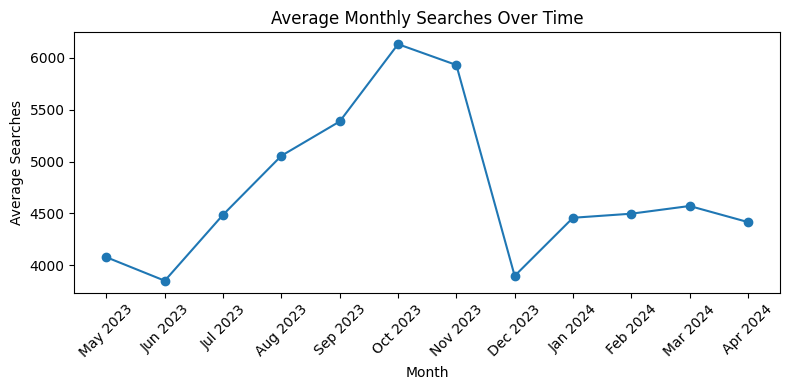

In [10]:
search_columns = [col for col in df.columns if col.startswith('searches_')]
df_searches = df[search_columns]
df_searches_mean = df_searches.mean()

new_labels = [col.split('_', 1)[1].capitalize().replace('_', ' ') for col in df_searches_mean.index]

plt.figure(figsize=(8, 4))
plt.plot(new_labels, df_searches_mean.values, marker='o')
plt.title('Average Monthly Searches Over Time')
plt.xlabel('Month')
plt.ylabel('Average Searches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly search volume for each keyword

In [11]:
monthly_data = df[['keyword'] + search_columns]
monthly_data.columns = ['keyword'] + new_labels

In [12]:
monthly_data.head(len(monthly_data))

,keyword,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023,Jan 2024,Feb 2024,Mar 2024,Apr 2024
0,beach cover ups,4400.0,5400.0,6600.0,6600.0,8100.0,8100.0,8100.0,9900.0,9900.0,5400.0,5400.0,4400.0
1,black cocktail dresses,5400.0,5400.0,6600.0,8100.0,8100.0,9900.0,8100.0,3600.0,5400.0,5400.0,6600.0,5400.0
2,black designer dresses,320.0,260.0,320.0,210.0,260.0,480.0,210.0,140.0,260.0,320.0,260.0,260.0
3,cocktail dresses,60500.0,60500.0,74000.0,90500.0,90500.0,110000.0,110000.0,49500.0,74000.0,74000.0,74000.0,74000.0
4,cotton midi dress,320.0,480.0,590.0,880.0,1300.0,1300.0,1300.0,1600.0,1000.0,1000.0,880.0,590.0
5,day dresses,1600.0,1600.0,1900.0,2900.0,3600.0,4400.0,4400.0,3600.0,2900.0,2900.0,2900.0,1900.0
6,denim dresses,22200.0,22200.0,33100.0,40500.0,49500.0,49500.0,49500.0,40500.0,40500.0,49500.0,49500.0,40500.0
7,designer cocktail dresses,590.0,720.0,590.0,590.0,880.0,720.0,720.0,390.0,590.0,720.0,480.0,390.0
8,designer cotton dress,30.0,10.0,10.0,20.0,10.0,30.0,40.0,30.0,30.0,50.0,30.0,20.0
9,designer dresses,4400.0,3600.0,4400.0,5400.0,6600.0,6600.0,5400.0,4400.0,5400.0,5400.0,5400.0,4400.0


### Month over Month biggest risers and fallers

In [13]:
"""
Working:

I initially decided to show the biggest risers and fallers in keyword search volume, considering both absolute 
and percentage changes. However, this approach presented some challenges:

1. Infinity values appeared when calculating percentage changes for keywords with zero searches in the previous 
month.

2. Upon further analysis, I realized that percentage changes were potentially misleading for this dataset. 
For example, a change from 10 to 50 searches (400% increase) appeared more significant than a change from 
10,000 to 12,000 searches (20% increase), despite the latter being more impactful in absolute terms.

Given these observations, I decided to focus primarily on absolute changes, as they provide a more accurate 
representation of significant movements in search volume for this particular dataset.

Below is the initial implementation that included both absolute and percentage changes:


def mom_changes(df):
    search_columns = [col for col in df.columns if col.startswith('searches_')]
    monthly_data = df[['keyword'] + search_columns]
    
    for i in range(1, len(search_columns)):
        abs_change_col = f'mom_abs_change_{search_columns[i]}'
        pct_change_col = f'mom_pct_change_{search_columns[i]}'
        
        monthly_data[abs_change_col] = monthly_data[search_columns[i]] - monthly_data[search_columns[i-1]]
        monthly_data[pct_change_col] = (monthly_data[search_columns[i]] - monthly_data[search_columns[i-1]]) / monthly_data[search_columns[i-1]]
    
    abs_change_columns = [col for col in monthly_data.columns if col.startswith('mom_abs_change_')]
    
    for abs_col in abs_change_columns:
        month = abs_col.replace('mom_abs_change_searches_', '').replace('_', ' ').title()
        pct_col = abs_col.replace('abs', 'pct')
        
        # Absolute changes
        abs_riser = monthly_data.loc[monthly_data[abs_col].idxmax()]
        abs_faller = monthly_data.loc[monthly_data[abs_col].idxmin()]
        
        # Percentage changes
        pct_riser = monthly_data.loc[monthly_data[pct_col].idxmax()]
        pct_faller = monthly_data.loc[monthly_data[pct_col].idxmin()]
        
        print(f"\nFor {month}:")
        print("Absolute Changes:")
        print(f"Biggest Riser: {abs_riser['keyword']}: +{abs_riser[abs_col]:,.0f}")
        print(f"Biggest Faller: {abs_faller['keyword']}: {abs_faller[abs_col]:,.0f}")
        
        print("\nPercentage Changes:")
        print(f"Biggest Riser: {pct_riser['keyword']}: {pct_riser[pct_col]:+.2%}")
        print(f"Biggest Faller: {pct_faller['keyword']}: {pct_faller[pct_col]:.2%}")
        print("-"*60)
"""

def mom_changes(df):
    search_columns = [col for col in df.columns if col.startswith('searches_')]
    monthly_data = df[['keyword'] + search_columns]
    
    for i in range(1, len(search_columns)):
        change_col = f'mom_change_{search_columns[i]}'
        monthly_data[change_col] = monthly_data[search_columns[i]] - monthly_data[search_columns[i-1]]
    
    change_columns = [col for col in monthly_data.columns if col.startswith('mom_change_')]
    
    for col in change_columns:
        month = col.replace('mom_change_searches_', '').replace('_', ' ').title()
        biggest_riser = monthly_data.loc[monthly_data[col].idxmax()]
        biggest_faller = monthly_data.loc[monthly_data[col].idxmin()]
        
        print(f"\nFor {month}:")
        print(f"Biggest Riser: {biggest_riser['keyword']}: +{biggest_riser[col]:,.0f}")
        print(f"Biggest Faller: {biggest_faller['keyword']}: {biggest_faller[col]:,.0f}")
        print("-"*50)
        
mom_changes(df)


For Jun 2023:
Biggest Riser: beach cover ups: +1,000
Biggest Faller: long sleeve midi dress: -4,900
--------------------------------------------------

For Jul 2023:
Biggest Riser: cocktail dresses: +13,500
Biggest Faller: long sleeve knitted dress: -4,900
--------------------------------------------------

For Aug 2023:
Biggest Riser: cocktail dresses: +16,500
Biggest Faller: long sleeve knitted dress: -4,500
--------------------------------------------------

For Sep 2023:
Biggest Riser: denim dresses: +9,000
Biggest Faller: long sleeve knitted dress: -3,000
--------------------------------------------------

For Oct 2023:
Biggest Riser: cocktail dresses: +19,500
Biggest Faller: short sleeve knitted dress: -200
--------------------------------------------------

For Nov 2023:
Biggest Riser: party dresses: +6,000
Biggest Faller: evening dresses: -9,000
--------------------------------------------------

For Dec 2023:
Biggest Riser: beach cover ups: +1,800
Biggest Faller: cocktail dre

### Joining Data | C.1 and Data | C.2, and visualizing spending to search volume

In [14]:
file_name_2 = 'Data | C.2.csv'
df2 = pd.read_csv(file_name_2,header=0)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    1206 non-null   object
 1   Spend    1206 non-null   object
 2   Keyword  1206 non-null   object
dtypes: object(3)
memory usage: 28.4+ KB


In [16]:
#Convert Month column to datetime
df2['Month'] = pd.to_datetime(df2['Month'], format='%d/%m/%Y')

#Standardize Keyword column and lowercase it for consistency
df2['Keyword'] = df2['Keyword'].str.strip().str.lower()
df2 = df2.rename(columns={'Keyword': 'keyword'})

#Handle characters in Spend varaiable and convert it to float
df2['Spend'] = df2['Spend'].str.replace('$', '').str.replace(',', '').astype(float)

In [17]:
df2.head()

,Month,Spend,keyword
0,2023-01-01,28903.0,beach cover ups
1,2023-01-01,14292.0,black cocktail dresses
2,2023-01-01,2131.0,black designer dresses
3,2023-01-01,22298.0,cocktail & formal styles
4,2023-01-01,24056.0,cocktail dresses


In [18]:
#Check for duplicates
df2[df2.duplicated(subset=['Month', 'keyword'], keep=False)]

,Month,Spend,keyword


In [19]:
#Melt df to get months and search volumes in separate rows for joining and further analysis
search_columns = [col for col in df.columns if col.startswith("searches_")]
df_melted = df.melt(
    id_vars=['keyword', 'currency', 'avg_monthly_searches', 'three_month_change', 'yoy_change','competition', 'competition_indexed_value', 'top_of_page_bid_low_range', 'top_of_page_bid_high_range'],
    value_vars=search_columns,
    var_name='Month', 
    value_name='Search_Volume')

#Convert Month column to datetime
df_melted['Month'] = df_melted['Month'].str.replace('searches_', '', regex=False)
df_melted['Month'] = pd.to_datetime(df_melted['Month'], format='%b_%Y')

In [20]:
df_melted.head()

,keyword,currency,avg_monthly_searches,three_month_change,yoy_change,competition,competition_indexed_value,top_of_page_bid_low_range,top_of_page_bid_high_range,Month,Search_Volume
0,beach cover ups,AUD,6600.0,-0.19,0.00,High,98.0,0.35,1.69,2023-05-01,4400.0
1,black cocktail dresses,AUD,6600.0,0.00,0.00,High,100.0,0.41,1.39,2023-05-01,5400.0
2,black designer dresses,AUD,260.0,-0.19,-0.19,High,97.0,0.60,1.83,2023-05-01,320.0
3,cocktail dresses,AUD,74000.0,0.00,0.22,High,100.0,0.39,1.36,2023-05-01,60500.0
4,cotton midi dress,AUD,880.0,-0.41,0.23,High,100.0,0.40,1.86,2023-05-01,320.0


In [21]:
# Merging the dataframes on keyword and month
merged_df = df_melted.merge(df2, on=['keyword', 'Month'], how='inner')

In [22]:
merged_df.head()

,keyword,currency,avg_monthly_searches,three_month_change,yoy_change,competition,competition_indexed_value,top_of_page_bid_low_range,top_of_page_bid_high_range,Month,Search_Volume,Spend
0,beach cover ups,AUD,6600.0,-0.19,0.00,High,98.0,0.35,1.69,2023-05-01,4400.0,733.0
1,black cocktail dresses,AUD,6600.0,0.00,0.00,High,100.0,0.41,1.39,2023-05-01,5400.0,5596.0
2,black designer dresses,AUD,260.0,-0.19,-0.19,High,97.0,0.60,1.83,2023-05-01,320.0,21218.0
3,cocktail dresses,AUD,74000.0,0.00,0.22,High,100.0,0.39,1.36,2023-05-01,60500.0,15748.0
4,cotton midi dress,AUD,880.0,-0.41,0.23,High,100.0,0.40,1.86,2023-05-01,320.0,27689.0


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   keyword                     600 non-null    object        
 1   currency                    600 non-null    object        
 2   avg_monthly_searches        600 non-null    float64       
 3   three_month_change          600 non-null    float64       
 4   yoy_change                  600 non-null    float64       
 5   competition                 600 non-null    object        
 6   competition_indexed_value   600 non-null    float64       
 7   top_of_page_bid_low_range   600 non-null    float64       
 8   top_of_page_bid_high_range  600 non-null    float64       
 9   Month                       600 non-null    datetime64[ns]
 10  Search_Volume               600 non-null    float64       
 11  Spend                       600 non-null    float64       

In [24]:
#Aggregating by month to get total spend and search volume for each month
agg_df = merged_df.groupby('Month').agg({'Spend': 'sum', 'Search_Volume': 'sum'}).reset_index()
agg_df.head()

,Month,Spend,Search_Volume
0,2023-05-01,854824.0,203930.0
1,2023-06-01,546251.0,192630.0
2,2023-07-01,755817.0,224410.0
3,2023-08-01,773161.0,252790.0
4,2023-09-01,827851.0,269310.0


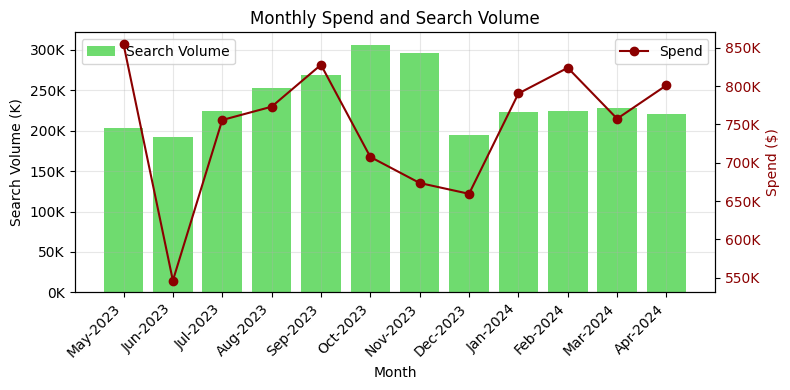

In [25]:
months = agg_df['Month'].dt.strftime('%b-%Y') 
spend = agg_df['Spend']/1000  
search_volume = agg_df['Search_Volume']/1000 

fig, ax1 = plt.subplots(figsize=(8, 4))

#Using Bar chart for search volume and adding Spend line on top of that, with 2nd y-axis
ax1.bar(months, search_volume, color='limegreen', alpha=0.7, label='Search Volume')

ax2 = ax1.twinx()
ax2.plot(months, spend, color='darkred', marker='o', label='Spend')

ax1.set_title('Monthly Spend and Search Volume')
ax1.set_xlabel('Month')
ax1.set_ylabel('Search Volume (K)', color='black')
ax2.set_ylabel('Spend ($)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}K'))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}K'))

ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [26]:
#Aggregating by keyword to get average spend and search volume for each keyword
agg2_df = merged_df.groupby(['keyword'], as_index=False).agg({'Search_Volume': 'mean','Spend': 'mean'})
agg2_df.head()

,keyword,Search_Volume,Spend
0,beach cover ups,6858.333333,11673.166667
1,black cocktail dresses,6500.000000,17918.083333
2,black designer dresses,275.000000,14691.583333
3,cocktail dresses,78458.333333,16323.833333
4,cotton midi dress,936.666667,16302.500000


In [27]:
#Create a new Avg_Volume_to_Spend_Ratio column to measure the cost-performance of each keyword considering the volume
agg2_df['Avg_Volume_to_Spend_Ratio']=agg2_df['Search_Volume']/agg2_df['Spend']
agg2_df.head()

,keyword,Search_Volume,Spend,Avg_Volume_to_Spend_Ratio
0,beach cover ups,6858.333333,11673.166667,0.587530
1,black cocktail dresses,6500.000000,17918.083333,0.362762
2,black designer dresses,275.000000,14691.583333,0.018718
3,cocktail dresses,78458.333333,16323.833333,4.806367
4,cotton midi dress,936.666667,16302.500000,0.057455


In [28]:
#Function to get top 4 and bottom 4 keywords based on Avg_Volume_to_Spend_Ratio 
def get_top_bottom_keywords(df):

    sorted_df = df.sort_values(by='Avg_Volume_to_Spend_Ratio', ascending=False)
    top_4_keywords = sorted_df.head(4)['keyword'].tolist()
    bottom_4_keywords = sorted_df.tail(4)['keyword'].tolist()

    return top_4_keywords, bottom_4_keywords

top_4, bottom_4 = get_top_bottom_keywords(agg2_df)
print("Top 4 Keywords:", top_4)
print("Bottom 4 Keywords:", bottom_4)


Top 4 Keywords: ['cocktail dresses', 'denim dresses', 'evening dresses', 'party dresses']
Bottom 4 Keywords: ['designer resort wear', 'wool midi dress', 'maxi wool dress', 'designer cotton dress']


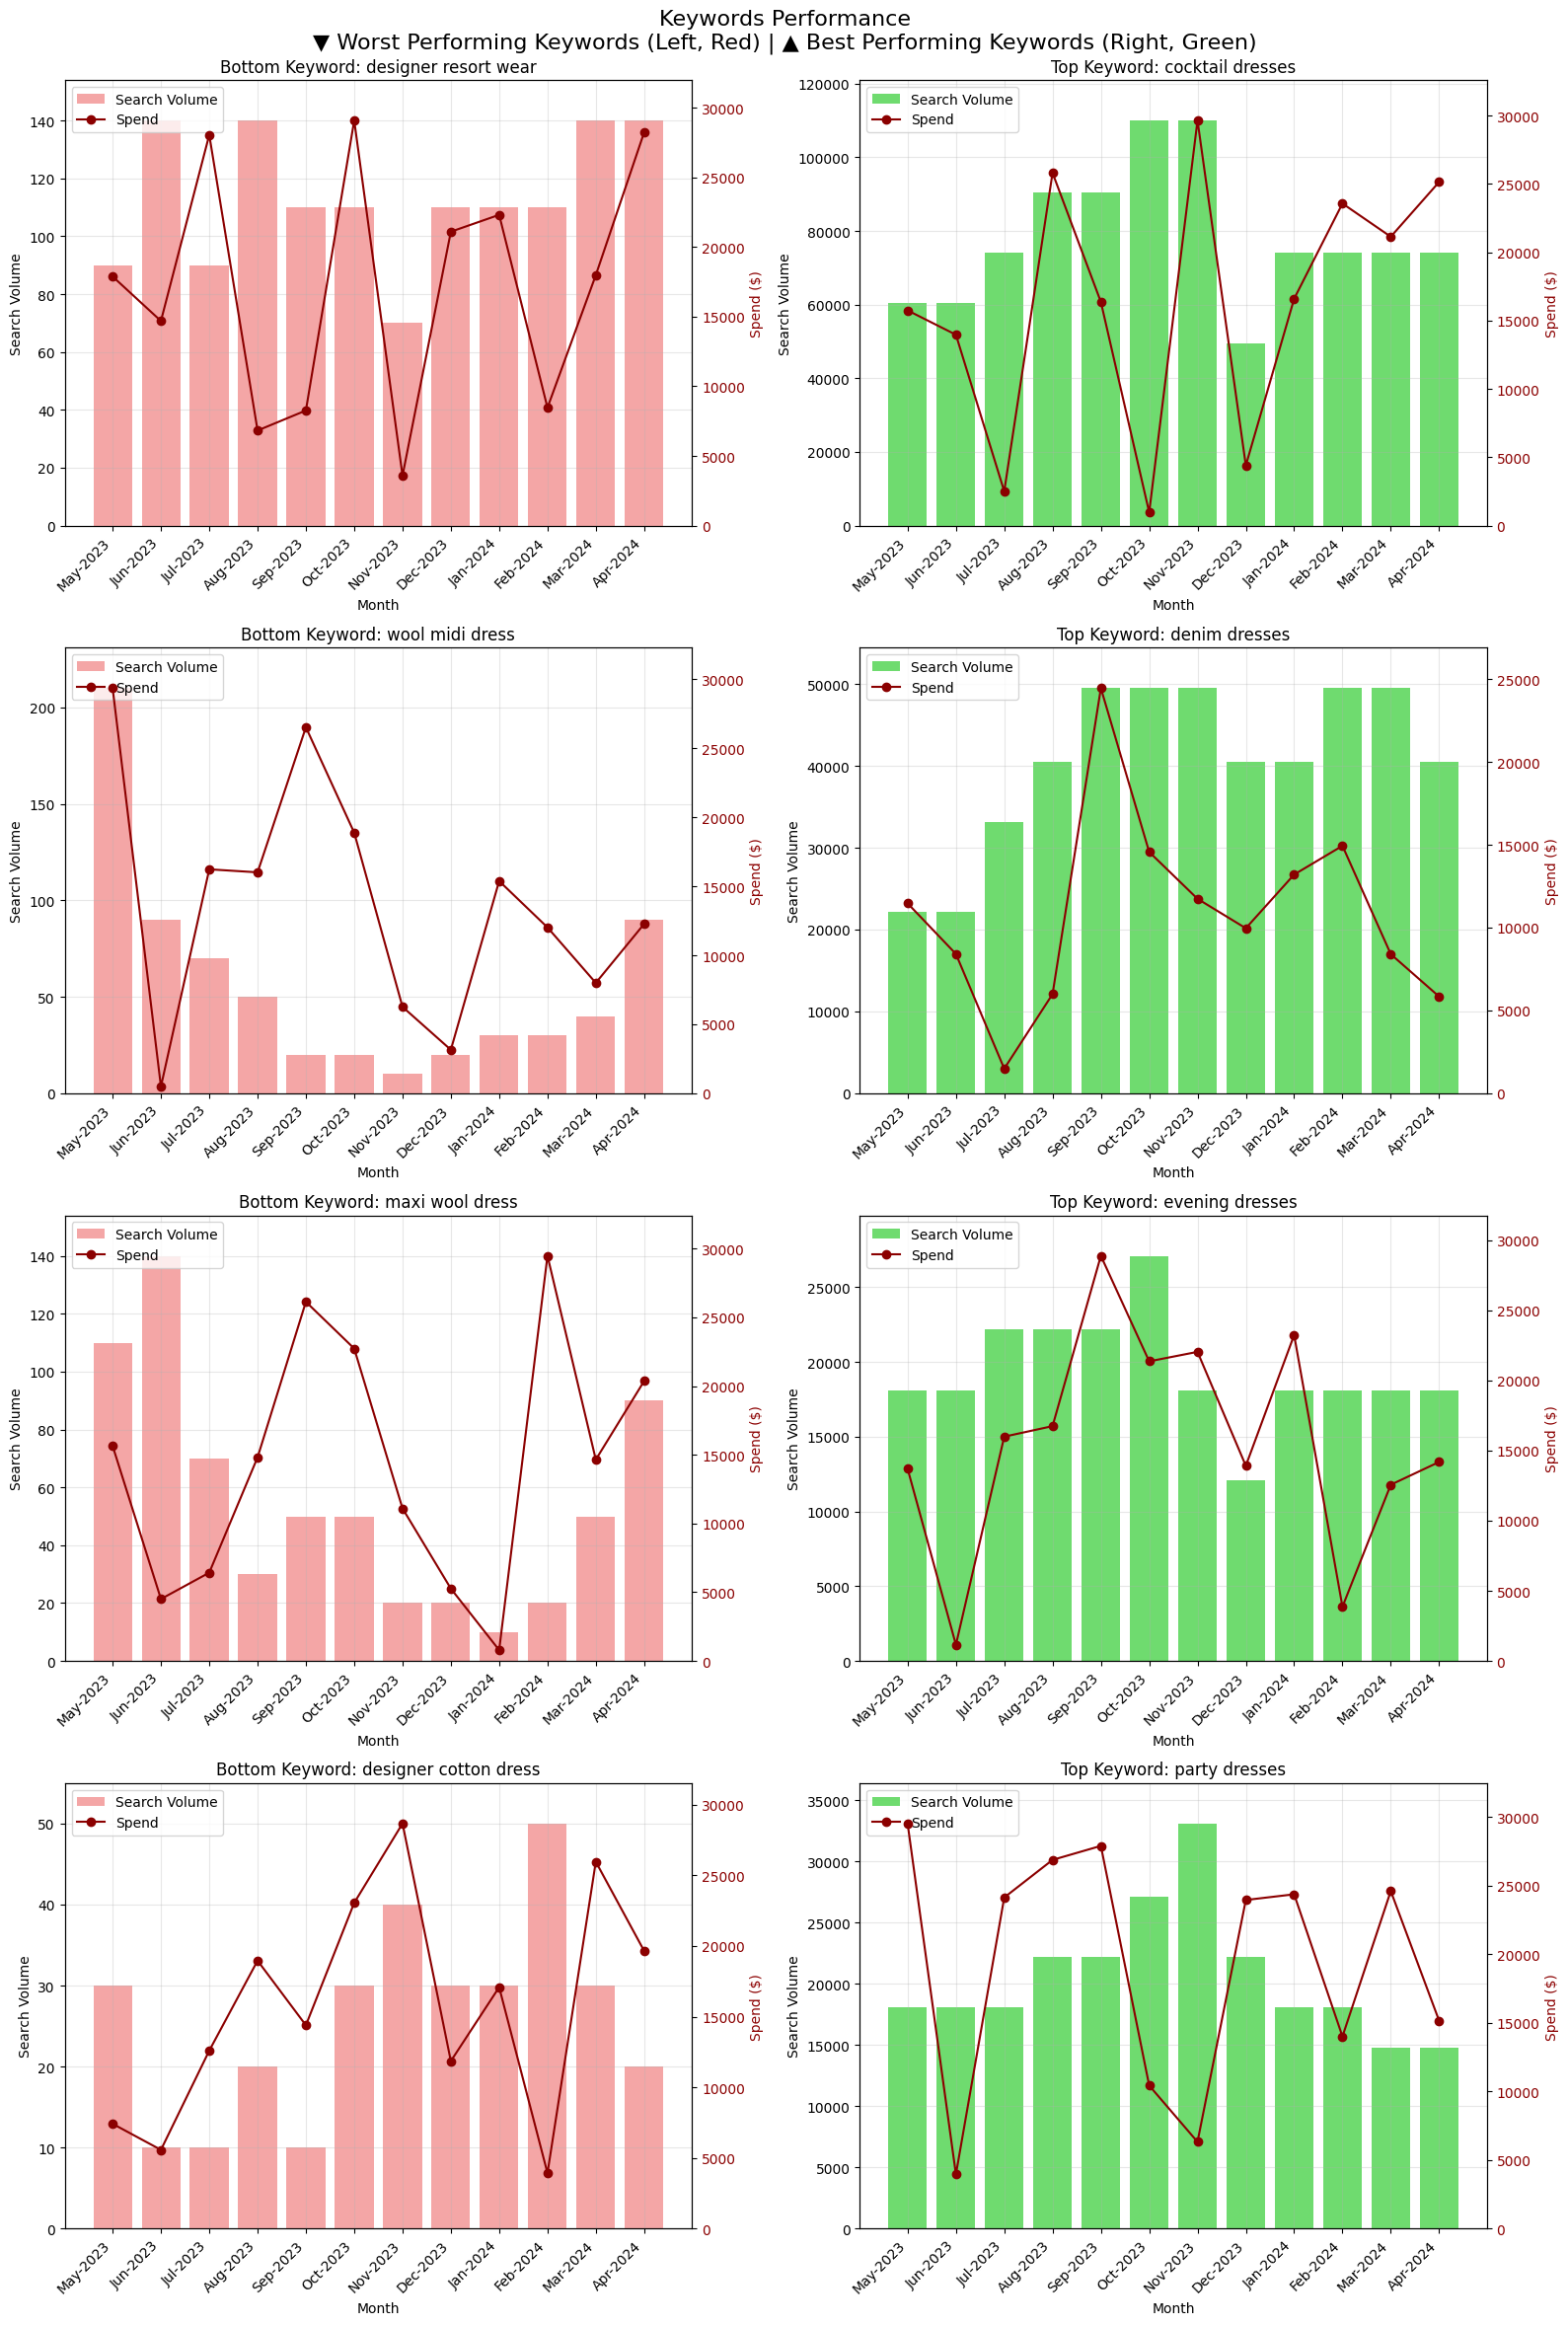

In [29]:
import matplotlib.pyplot as plt

def plot_keywords_subplot(df, bottom_4_keywords, top_4_keywords):
    fig, axes = plt.subplots(4, 2, figsize=(16, 24))
    all_keywords = list(zip(bottom_4_keywords, top_4_keywords))
    
    bottom_colors = {'search': 'lightcoral', 'spend': 'darkred'}
    top_colors = {'search': 'limegreen', 'spend': 'darkred'}
    
    for row, (bottom_keyword, top_keyword) in enumerate(all_keywords):
        for col, keyword in enumerate([bottom_keyword, top_keyword]):
            keyword_data = df[df['keyword'] == keyword]
            months = keyword_data['Month'].dt.strftime('%b-%Y')
            search_volume = keyword_data['Search_Volume']
            spend = keyword_data['Spend']
            ax1 = axes[row, col]
            ax2 = ax1.twinx()
            colors = bottom_colors if col == 0 else top_colors
            
            #Plot search volume as bars
            ax1.bar(months, search_volume, color=colors['search'], alpha=0.7, label='Search Volume')
            ax1.set_ylabel('Search Volume', color='black')
            ax1.tick_params(axis='y', labelcolor='black')
            
            #Plot spend as a line
            ax2.plot(months, spend, color=colors['spend'], marker='o', label='Spend')
            ax2.set_ylabel('Spend ($)', color=colors['spend'])
            ax2.tick_params(axis='y', labelcolor=colors['spend'])
            keyword_type = 'Bottom' if col == 0 else 'Top'
            ax1.set_title(f'{keyword_type} Keyword: {keyword}')
            ax1.set_xlabel('Month')
            ax1.grid(True, alpha=0.3)
            ax1.set_xticklabels(months, rotation=45, ha='right')
            ax1.set_ylim(0, max(search_volume) * 1.1)
            ax2.set_ylim(0, max(spend) * 1.1)
            #Combine legends
            lines1, labels1 = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    plt.suptitle('Keywords Performance\n▼ Worst Performing Keywords (Left, Red) | ▲ Best Performing Keywords (Right, Green)', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95) 
    plt.show()

plot_keywords_subplot(merged_df, bottom_4, top_4)